# Random Forest Hyperparameter Optimization

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
import sklearn.model_selection as ms

data = pd.read_csv(r'E:\personal\ucla_ext\Intro to Data Science\introdatasci_final_project\data\full.csv')
data = data[data['WATER_ELEVATION'] >= 0].reset_index(drop=True)
data['GW_MEAS_DATE'] = pd.to_numeric(pd.to_datetime(data['GW_MEAS_DATE']))

x_cols = ['GW_MEAS_DATE','LATITUDE','LONGITUDE', 'PRCP', 'TMAX', 'TMIN', 'ELEVATION']
y_cols = ['DEPTH', 'WATER_ELEVATION']

x = data[x_cols]
y = data[y_cols[1]]

In [35]:
data

,WID,GW_MEAS_DATE,LATITUDE,LONGITUDE,DEPTH,ELEVATION,WATER_ELEVATION,PRCP,TMAX,TMIN
0,SLT4307472-4A,948931200000000000,34.021058,-118.451652,157.45,165.66,8.21,0.0,200.0,83.0
1,SLT4307472-115A,948931200000000000,34.018806,-118.455532,142.46,151.94,9.48,0.0,200.0,83.0
2,SL603792561-MW-14,948931200000000000,33.891020,-118.024076,60.85,76.25,15.40,0.0,200.0,83.0
3,SLT4307472-57A,948931200000000000,34.019668,-118.454001,149.01,158.18,9.17,0.0,200.0,83.0
4,SL603792561-MW-01,948931200000000000,33.890665,-118.023660,61.15,76.30,15.15,0.0,200.0,83.0
...,...,...,...,...,...,...,...,...,...,...
485803,SL204CP1893-MW3,1656547200000000000,33.881710,-118.219151,52.41,63.96,11.55,0.0,289.0,172.0
485804,SL204CP1893-MW2,1656547200000000000,33.881350,-118.219306,51.83,62.89,11.06,0.0,289.0,172.0
485805,SL204CP1893-MW1,1656547200000000000,33.881410,-118.219139,52.46,63.14,10.68,0.0,289.0,172.0
485806,SL204AF1745-GMW-8,1656547200000000000,33.878426,-118.142977,25.12,62.24,37.12,0.0,289.0,172.0


## Single Hyperparameter Optimization

### Split Data into Train and Test Sets

In [4]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=42)

#### N Estimators Optimization

In [5]:
n_estimators = list(range(50, 150, 10))


In [6]:
train_results = {}
test_results = {}

count = 0
total = len(n_estimators)

for n in n_estimators:

    model = RandomForestRegressor(
        n_estimators=n,
        criterion ='squared_error',
        random_state=42,
        n_jobs=10,
        #verbose=1
        )

    model = model.fit(x_train, y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_mse = metrics.mean_squared_error(y_train, train_pred)
    test_mse = metrics.mean_squared_error(y_test, test_pred)

    train_results[n] = train_mse
    test_results[n] = test_mse

    print(f'Train MSE for n_estimators = {n}: {train_mse}')
    print(f'Test MSE for n_estimators = {n}: {test_mse}')

    count += 1
    print(f'{count} / {total}')


Train MSE for n_estimators = 50: 3.382634823362102
Test MSE for n_estimators = 50: 25.246222308699306
1 / 10
Train MSE for n_estimators = 60: 3.223960613709154
Test MSE for n_estimators = 60: 24.723184698467854
2 / 10
Train MSE for n_estimators = 70: 3.1292999394867977
Test MSE for n_estimators = 70: 24.621053096619885
3 / 10
Train MSE for n_estimators = 80: 3.099644205999266
Test MSE for n_estimators = 80: 25.13162968997309
4 / 10
Train MSE for n_estimators = 90: 3.0608872696294163
Test MSE for n_estimators = 90: 25.367036724290074
5 / 10
Train MSE for n_estimators = 100: 3.068145403485356
Test MSE for n_estimators = 100: 25.110688214910752
6 / 10
Train MSE for n_estimators = 110: 3.0872493871965236
Test MSE for n_estimators = 110: 24.324222882215054
7 / 10
Train MSE for n_estimators = 120: 3.0361990024602563
Test MSE for n_estimators = 120: 23.828919303211514
8 / 10
Train MSE for n_estimators = 130: 2.991465905863523
Test MSE for n_estimators = 130: 23.565283615775197
9 / 10
Train MS

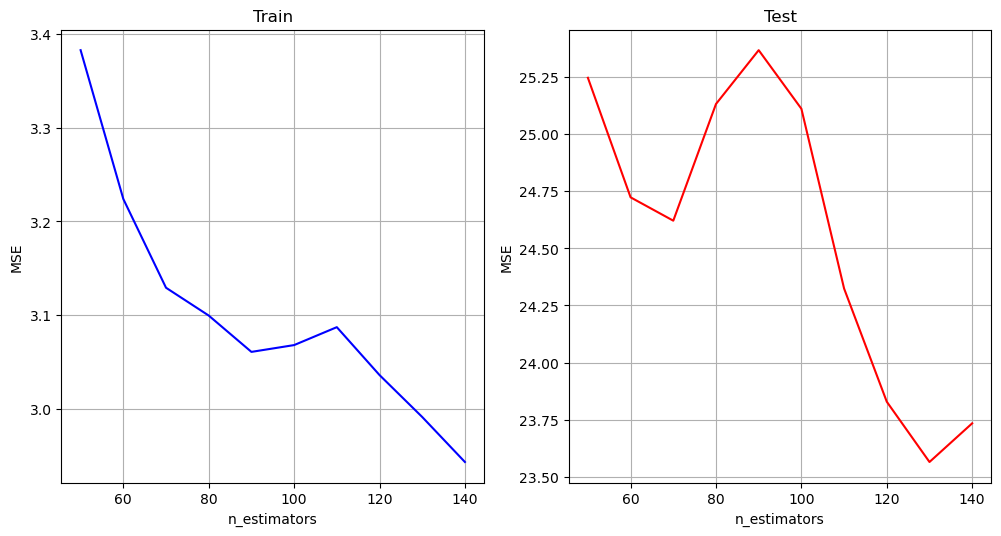

In [9]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12, 6)
fig.set_dpi(100)


axes[0].plot(train_results.keys(), train_results.values(), 'b-', label='Train')
axes[1].plot(test_results.keys(), test_results.values(), 'r-', label='Test')
axes[0].grid(True)
axes[1].grid(True)
axes[0].set_xlabel('n_estimators')
axes[1].set_xlabel('n_estimators')
axes[0].set_ylabel('MSE')
axes[1].set_ylabel('MSE')
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()


#### Max Depth Optimization

In [33]:
max_depth = list(range(20,60,5))
max_depth

[22, 23, 24, 25, 26, 27]

In [31]:
train_results = {}
test_results = {}

count = 0
total = len(max_depth)

for d in max_depth:

    model = RandomForestRegressor(
        criterion ='squared_error',
        random_state=42,
        max_depth=d,
        n_jobs=10,
        #verbose=1
        )

    model = model.fit(x_train, y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_mse = metrics.mean_squared_error(y_train, train_pred)
    test_mse = metrics.mean_squared_error(y_test, test_pred)

    train_results[d] = train_mse
    test_results[d] = test_mse

    print(f'Train MSE for max_depth = {d}: {train_mse}')
    print(f'Test MSE for max_depth = {d}: {test_mse}')

    count += 1
    print(f'{count} / {total}')

Train MSE for max_depth = 20: 4.329030102269223
Test MSE for max_depth = 20: 25.95812843055088
1 / 8
Train MSE for max_depth = 25: 3.2099974279255203
Test MSE for max_depth = 25: 24.900671290220025
2 / 8
Train MSE for max_depth = 30: 3.133120916544906
Test MSE for max_depth = 30: 24.983877870755776
3 / 8
Train MSE for max_depth = 35: 3.108560763232556
Test MSE for max_depth = 35: 24.95542449962932
4 / 8
Train MSE for max_depth = 40: 3.110445091007429
Test MSE for max_depth = 40: 25.036340643498818
5 / 8
Train MSE for max_depth = 45: 3.074228080181711
Test MSE for max_depth = 45: 25.0176067113672
6 / 8
Train MSE for max_depth = 50: 3.0746014994410396
Test MSE for max_depth = 50: 25.109625558507545
7 / 8
Train MSE for max_depth = 55: 3.0681454034853552
Test MSE for max_depth = 55: 25.110688214910745
8 / 8


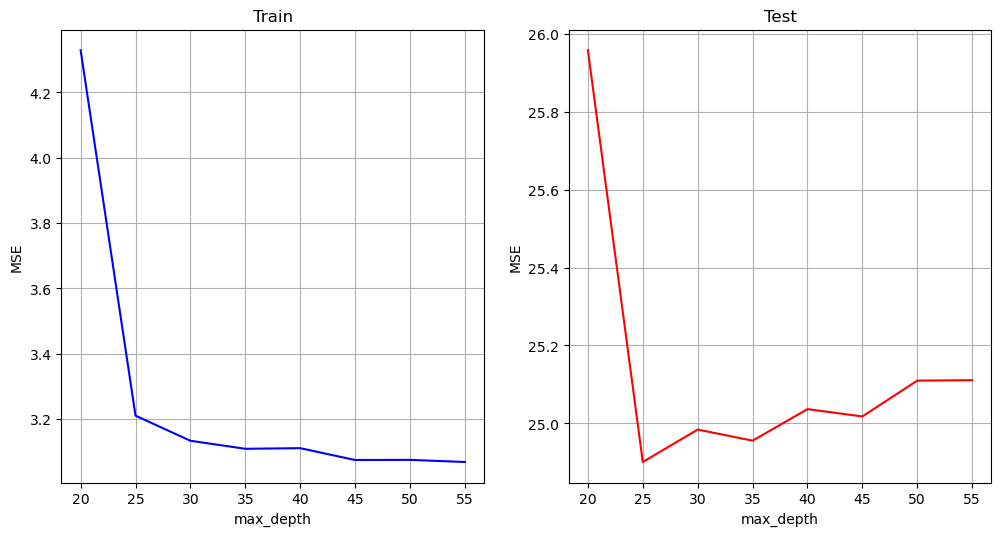

In [32]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12, 6)
fig.set_dpi(100)


axes[0].plot(train_results.keys(), train_results.values(), 'b-', label='Train')
axes[1].plot(test_results.keys(), test_results.values(), 'r-', label='Test')
axes[0].grid(True)
axes[1].grid(True)
axes[0].set_xlabel('max_depth')
axes[1].set_xlabel('max_depth')
axes[0].set_ylabel('MSE')
axes[1].set_ylabel('MSE')
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

## Grid Search Cross Validation: Multi-Hyperparameter Optimization

In [ ]:
def rfr_optimize_all(x,y,criterion,range_list):
    '''
    This function is used to optimize the hyperparameters of the Random Forest Regressor.
    Input:
        x: the training data
        y: the target data
        range_list: a list of hyperparameters to be optimized
    '''
    rfr = RandomForestRegressor(
        criterion =criterion,
        n_jobs=10,
        verbose=1
        )

    param_grid = {
        'n_estimators': range_list[0],
        'max_depth': range_list[1],
        }

    grid = ms.GridSearchCV(rfr, param_grid, cv=5, scoring=criterion[1])
    grid.fit(x, y)
    
    return grid.best_params_

### Squared Error

In [ ]:
criterion = ['squared_error', 'neg_mean_squared_error']
n_estimators = list(range(94, 99, 1))
max_depth = list(range(56,57,1))
range_list = [n_estimators, max_depth]


best_mse = rfr_optimize_all(x, y, criterion, range_list)
print(best_mse)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.6s
[Parallel(n_jobs=10)]: Done  94 out of  94 | elapsed:   22.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  94 out of  94 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.5s
[Parallel(n_jobs=10)]: Done  94 out of  94 | elapsed:   20.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done  94 out of  94 | elapsed:    0.3s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.3s
[Parallel(n

{'max_depth': 56, 'n_estimators': 96}


[Parallel(n_jobs=10)]: Done  96 out of  96 | elapsed:   26.0s finished


## Test Model

In [67]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2)

In [68]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2)

parameters = {'max_depth': 56, 'n_estimators': 96}

rfr = RandomForestRegressor(
    n_estimators=parameters.get('n_estimators'),
    max_depth=parameters.get('max_depth'),
    criterion ='squared_error',
    n_jobs=10,
    verbose=2
    )

In [69]:
rfr.fit(x_train, y_train)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 96building tree 2 of 96
building tree 3 of 96

building tree 4 of 96
building tree 5 of 96
building tree 6 of 96
building tree 7 of 96
building tree 8 of 96
building tree 9 of 96
building tree 10 of 96
building tree 11 of 96
building tree 12 of 96
building tree 13 of 96
building tree 14 of 96
building tree 15 of 96
building tree 16 of 96
building tree 17 of 96
building tree 18 of 96
building tree 19 of 96
building tree 20 of 96
building tree 21 of 96
building tree 22 of 96
building tree 23 of 96
building tree 24 of 96
building tree 25 of 96
building tree 26 of 96
building tree 27 of 96
building tree 28 of 96
building tree 29 of 96
building tree 30 of 96
building tree 31 of 96
building tree 32 of 96
building tree 33 of 96
building tree 34 of 96


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    6.1s


building tree 35 of 96
building tree 36 of 96
building tree 37 of 96
building tree 38 of 96
building tree 39 of 96
building tree 40 of 96
building tree 41 of 96
building tree 42 of 96
building tree 43 of 96
building tree 44 of 96
building tree 45 of 96
building tree 46 of 96
building tree 47 of 96
building tree 48 of 96
building tree 49 of 96
building tree 50 of 96
building tree 51 of 96
building tree 52 of 96
building tree 53 of 96
building tree 54 of 96
building tree 55 of 96
building tree 56 of 96
building tree 57 of 96
building tree 58 of 96
building tree 59 of 96
building tree 60 of 96
building tree 61 of 96
building tree 62 of 96
building tree 63 of 96
building tree 64 of 96
building tree 65 of 96
building tree 66 of 96
building tree 67 of 96
building tree 68 of 96building tree 69 of 96

building tree 70 of 96
building tree 71 of 96
building tree 72 of 96
building tree 73 of 96
building tree 74 of 96
building tree 75 of 96
building tree 76 of 96
building tree 77 of 96
building tr

[Parallel(n_jobs=10)]: Done  96 out of  96 | elapsed:   21.5s finished


RandomForestRegressor(max_depth=56, n_estimators=96, n_jobs=10, verbose=2)

In [71]:
y_pred = rfr.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

r2 = metrics.r2_score(y_test, y_pred)
print(f'R2: {r2}')

adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - len(x_test.columns))
print(f'Adjusted R2: {adj_r2}')

evs = metrics.explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {evs}')

MSE: 15.043011491998996
RMSE: 3.8785321311030794
R2: 0.9998161650429246
Adjusted R2: 0.9998161536898317
Explained Variance Score: 0.9998161675880348
